## Load data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

test = pd.read_csv('../lending_club/test.csv')
train = pd.read_csv('../lending_club/train.csv')

for column in train.columns:
    if train[column].dtype == 'object':
        le = LabelEncoder()
        le.fit(pd.concat([train[column],test[column]]))
        train[column] = le.transform(train[column])
        test[column] = le.transform(test[column])

## Create Dataset

In [2]:
from mlchecks import Dataset
from mlchecks.checks.overfit.boosting_overfit import boosting_overfit

label = 'loan_status'
features = list(set(train.columns) - {label})
train_ds = Dataset(train, features=features, label=label)
validation_ds = Dataset(test, features=features, label=label)

## Prepare train

In [3]:
features = train.drop('loan_status', axis=1)
target = train['loan_status'].astype(int)


## Classification models

AdaBoostClassifier

Boosting Overfit

Test for overfit in boosting models.

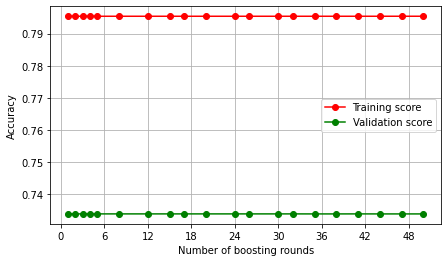

LGBMClassifier

Boosting Overfit

Test for overfit in boosting models.

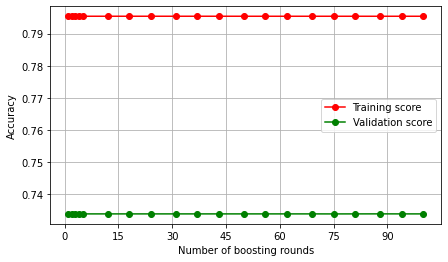

[10:21:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier

Boosting Overfit

Test for overfit in boosting models.

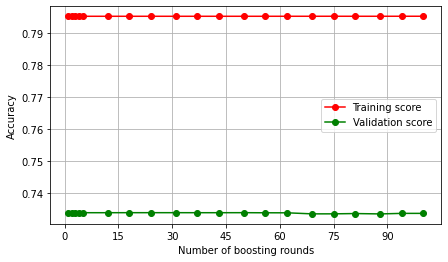

CatBoostClassifier

Boosting Overfit

Test for overfit in boosting models.

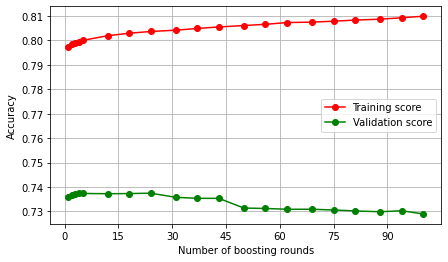

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from IPython.display import display_html

models = [AdaBoostClassifier(), LGBMClassifier(), XGBClassifier(use_label_encoder=False, learning_rate=0.1), 
          CatBoostClassifier(iterations=100, silent=True)]

for clf in models:
    clf.fit(features, target)
    r = boosting_overfit(train_ds, validation_ds, clf)
    display_html(f'<h2>{clf.__class__.__name__}</h2>', raw=True)
    display(r)